<a href="https://colab.research.google.com/github/HassanCoulibaly/MachineLearningProject/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
# Load CSV files
train_df = pd.read_csv('dataset/train_df.csv')
test_df = pd.read_csv('dataset/test_df.csv')

# Encode sentiment labels
label_encoder = LabelEncoder()
label_encoder.fit(['negative', 'neutral', 'positive'])
y_train = tf.keras.utils.to_categorical(label_encoder.transform(train_df['sentiment']), num_classes=3)
y_test = tf.keras.utils.to_categorical(label_encoder.transform(test_df['sentiment']), num_classes=3)

# Tokenize text
vocab_size = 10000
max_length = 40
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['tweet'])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['tweet']), maxlen=max_length, padding='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['tweet']), maxlen=max_length, padding='post')

In [ ]:
embedding_dim = 50
embedding_index = {}
with open('dataset/glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

**MODEL**

In [ ]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    Conv1D(12, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=3),
    Flatten(),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

**TRAINING**

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4876 - loss: 0.9864 - val_accuracy: 0.5506 - val_loss: 0.9396
Epoch 2/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5768 - loss: 0.8690 - val_accuracy: 0.5884 - val_loss: 0.8791
Epoch 3/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6014 - loss: 0.8416 - val_accuracy: 0.5987 - val_loss: 0.8560
Epoch 4/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6135 - loss: 0.8285 - val_accuracy: 0.5918 - val_loss: 0.8624
Epoch 5/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6165 - loss: 0.8190 - val_accuracy: 0.5918 - val_loss: 0.8664
Epoch 6/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6251 - loss: 0.8076 - val_accuracy: 0.5887 - val_loss: 0.8727
Epoch 7/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6260 - loss: 0.8030 - val_accuracy: 0.5958 - val_loss: 0.8627
Epoch 8/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6250 - loss: 0.80

**PLOT**

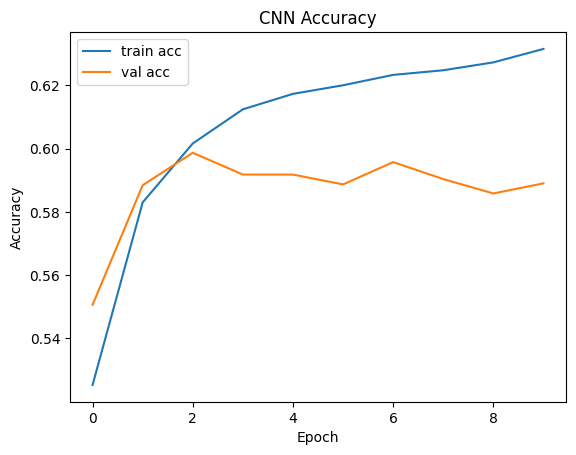

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()